In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Rescaling, Flatten

import matplotlib.pyplot as plt

In [3]:
# tüm verileri indiriyoruz
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# veri setinden sadece 0 ve 1 olanları alıyoruz 
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

# bunları eğitim seti ve test seti olarak değişkenlere atıyoruz
X_train, Y_train = x_train[train_filter], y_train[train_filter]
X_test, Y_test = x_test[test_filter], y_test[test_filter]


In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")
print(f"Unique labels in Y_train: {np.unique(Y_train)}")
print(f"Unique labels in Y_test: {np.unique(Y_test)}")

X_train shape: (12665, 28, 28)
Y_train shape: (12665,)
X_test shape: (2115, 28, 28)
Y_test shape: (2115,)
Unique labels in Y_train: [0 1]
Unique labels in Y_test: [0 1]


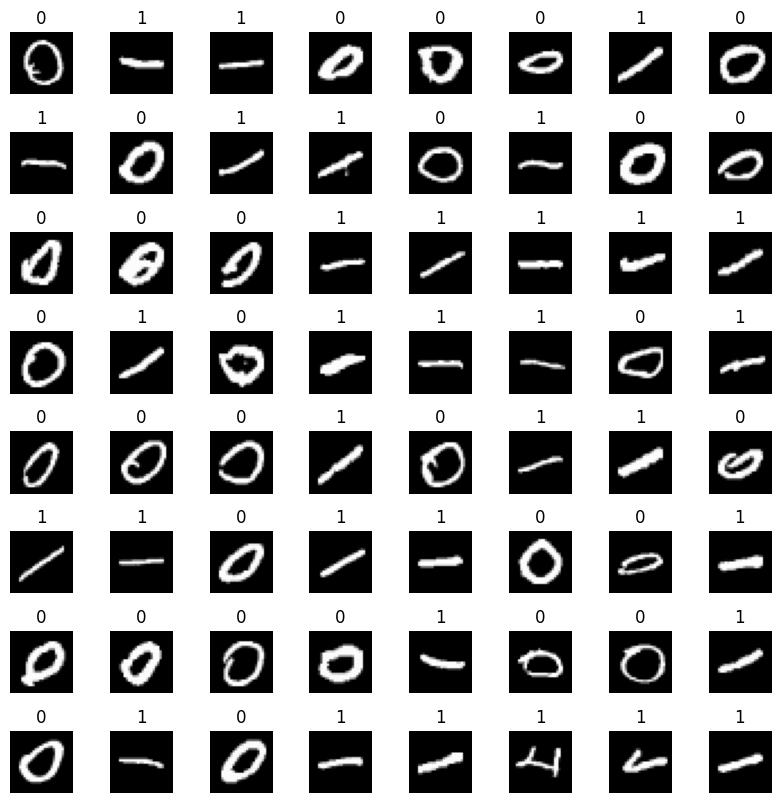

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n, _ = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y_train[random_index])
    ax.set_axis_off()

In [7]:
print ('The first element of y is: ', Y_train[0])
print ('The last element of y is: ', Y_train[-1])

The first element of y is:  0
The last element of y is:  1


In [8]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(Y_train.shape))

The shape of X is: (12665, 28, 28)
The shape of y is: (12665,)


In [23]:
model = Sequential(
    [
        tf.keras.Input(shape=(28, 28)),  # Giriş katmanını burada belirtiyoruz
        Rescaling(1./255),               # Sadece normalize ediyor
        Flatten(),  # (28x28 -> 784)
        Dense(units=25, activation='sigmoid'),
        Dense(units=15, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
    ], name = "MNIST"
)

In [24]:
model.summary()

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,031 (78.25 KB)

 Trainable params: 20,031 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Dense katmanlarını seçip ağırlıkları ve bias'ları alıyoruz
for i, layer in enumerate(model.layers):
    if isinstance(layer, Dense):  # Sadece Dense katmanlarını alıyoruz
        W, b = layer.get_weights()
        print(f"Layer {i+1} ->  w: {W.shape} , b: {b.shape}")


Layer 3 ->  w: (784, 25) , b: (25,)
Layer 4 ->  w: (25, 15) , b: (15,)
Layer 5 ->  w: (15, 1) , b: (1,)


In [27]:
# eğitim aşaması 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train, Y_train,
    epochs = 20
)

Epoch 1/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2937
Epoch 2/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0256
Epoch 3/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124
Epoch 4/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068
Epoch 5/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045
Epoch 6/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045
Epoch 7/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032
Epoch 8/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 9/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0013
Epoch 10/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023    
Epoch 11/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7330e-04
Epoch 12/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015    
Epoch 13/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.1890e-04  
Epoch 14/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012      
Epoch 15/20
396/396 ━━━━━━━━━━━━━

In [28]:
prediction = model.predict(X_train[0].reshape(1,28,28))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X_train[-1].reshape(1,28,28))  # a one
print(f" predicting a one:  {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 predicting a zero: [[0.00010844]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
 predicting a one:  [[0.9999312]]


In [29]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

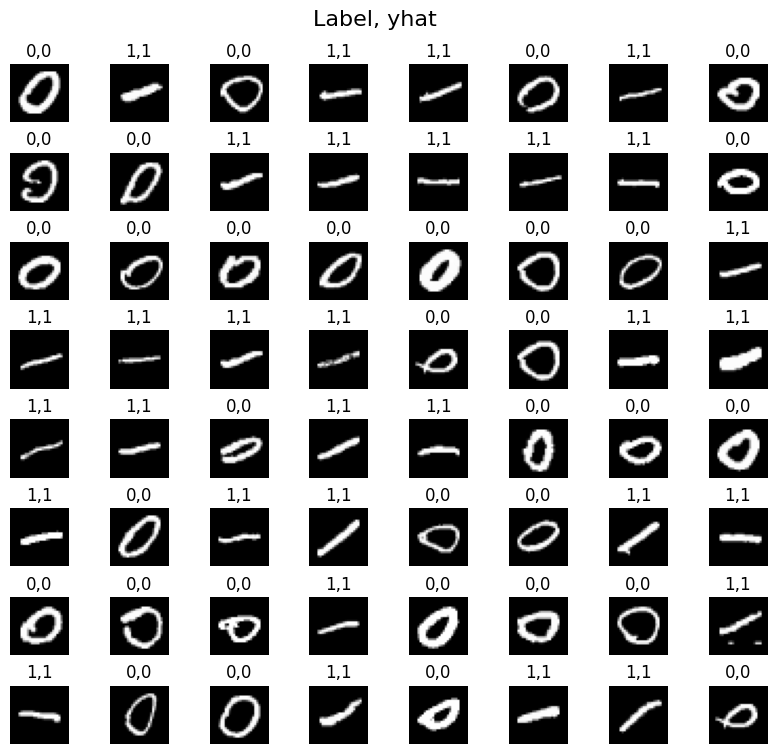

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n, _ = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,28,28))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{Y_test[random_index]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()